In [2]:
import cv2
import os
import functions
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.models import load_model
model = load_model('n_data_aug_92.h5')

2023-06-04 11:48:16.239592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 11:48:29.493172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
path = 'Bananas time dataset'
imagens_time = []
for folder_path, folders, files in os.walk(path):
    print(files)


['t6_day0 (5).jpg', 't5_day0 (7).jpg', 't5_day3 (1).jpg', 't1_day3 (3).jpg', 't2_day3 (1).jpg', 't6_day3 (3).jpg', 't1_day2 (2).jpg', 't6_day2 (2).jpg', 't6_day1 (4).jpg', 't1_day1 (4).jpg', 't3_day4 (4).jpg', 't0_day3 (2).jpg', 't4_day4 (4).jpg', 't0_day0 (4).jpg', 't4_day0 (6).jpg', 't0_day1 (5).jpg', 't0_day2 (3).jpg', 't4_day2 (1).jpg', 't3_day2 (1).jpg', 't0_day2 (2).jpg', 't0_day1 (4).jpg', 't4_day0 (7).jpg', 't0_day0 (5).jpg', 't3_day3 (1).jpg', 't6_day0 (8).jpg', 't0_day3 (3).jpg', 't4_day3 (1).jpg', 't6_day1 (5).jpg', 't2_day2 (1).jpg', 't6_day2 (3).jpg', 't5_day2 (1).jpg', 't1_day2 (3).jpg', 't6_day3 (2).jpg', 't2_day4 (4).jpg', 't1_day3 (2).jpg', 't5_day0 (6).jpg', 't1_day0 (4).jpg', 't6_day0 (4).jpg', 't3_day4 (2).jpg', 't0_day3 (4).jpg', 't4_day4 (2).jpg', 't0_day0 (2).jpg', 't3_day1 (1).jpg', 't4_day1 (1).jpg', 't0_day1 (3).jpg', 't0_day2 (5).jpg', 't6_day0 (3).jpg', 't2_day0 (1).jpg', 't1_day0 (3).jpg', 't5_day0 (1).jpg', 't6_day4 (1).jpg', 't2_day4 (3).jpg', 't1_day4 (1

In [5]:
imagens_time = []
for i in range(len(files)):
    imagens_time.append(path+"/"+str(files[i]))

In [6]:
print(imagens_time)

['Bananas time dataset/t6_day0 (5).jpg', 'Bananas time dataset/t5_day0 (7).jpg', 'Bananas time dataset/t5_day3 (1).jpg', 'Bananas time dataset/t1_day3 (3).jpg', 'Bananas time dataset/t2_day3 (1).jpg', 'Bananas time dataset/t6_day3 (3).jpg', 'Bananas time dataset/t1_day2 (2).jpg', 'Bananas time dataset/t6_day2 (2).jpg', 'Bananas time dataset/t6_day1 (4).jpg', 'Bananas time dataset/t1_day1 (4).jpg', 'Bananas time dataset/t3_day4 (4).jpg', 'Bananas time dataset/t0_day3 (2).jpg', 'Bananas time dataset/t4_day4 (4).jpg', 'Bananas time dataset/t0_day0 (4).jpg', 'Bananas time dataset/t4_day0 (6).jpg', 'Bananas time dataset/t0_day1 (5).jpg', 'Bananas time dataset/t0_day2 (3).jpg', 'Bananas time dataset/t4_day2 (1).jpg', 'Bananas time dataset/t3_day2 (1).jpg', 'Bananas time dataset/t0_day2 (2).jpg', 'Bananas time dataset/t0_day1 (4).jpg', 'Bananas time dataset/t4_day0 (7).jpg', 'Bananas time dataset/t0_day0 (5).jpg', 'Bananas time dataset/t3_day3 (1).jpg', 'Bananas time dataset/t6_day0 (8).jpg',

In [27]:
#takes image path and cnn prediction model
def get_cnn_result(image, model):
    #outputs = np.array((len(image), 4))
    hsv_max = [179, 255, 255]

    # read image
    img = cv2.imread(image)
    print(f"img.shape-->{img.shape}")

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #plt.axis('off')
    plt.show()

    # resize image
    re_img = cv2.resize(img, (64, 64))
    print(f"re_img.shape-->{re_img.shape}")

    # convert to hsv color space
    hsv_img = cv2.cvtColor(re_img, cv2.COLOR_BGR2HSV) # BGR to RGB 
    print(f"hsv_img.shape-->{hsv_img.shape}")

    # normalize images's data
    norm_img = np.divide(hsv_img, hsv_max)
    print(f"norm_img.shape-->{norm_img.shape}")

    res = model.predict(np.array([norm_img]))
    print(res)

img.shape-->(4032, 3024, 3)


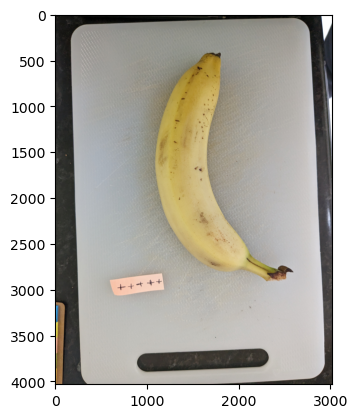

re_img.shape-->(64, 64, 3)
hsv_img.shape-->(64, 64, 3)
norm_img.shape-->(64, 64, 3)
1/1 [==============================] - 0s 56ms/step
[[1.177383e-04 0.000000e+00 9.998822e-01 0.000000e+00]]


In [28]:
get_cnn_result(imagens_time[0], model)

In [ ]:
img_2 = cv2.imread(imagens_time[0])
rgb_img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB) # BGR to RGB 
plt.imshow(rgb_img_2)
plt.show()